In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = pd.read_csv("train.csv")

In [4]:
mnist.shape

(42000, 785)

In [5]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = mnist.iloc[ : , 1:].values
y = mnist['label'].values

In [7]:
X.shape

(42000, 784)

In [8]:
y.shape

(42000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [11]:
X_train.shape

(33600, 784)

In [12]:
y_train.shape

(33600,)

In [13]:
X_test.shape

(8400, 784)

In [14]:
y_test.shape

(8400,)

In [15]:
def plot_image(img):
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.show()

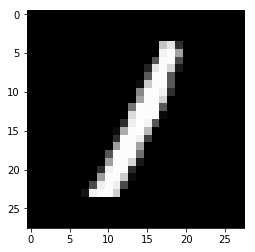

1

In [16]:
plot_image(X_train[62])
y_train[62]

# kNN

In [17]:
def distance(pA, pB):
    return np.sum((pB - pA)**2)**0.5

In [18]:
def kNN(X, y, x_query, k = 5):
    """
    X - > (m, 784)  np array
    y - > (m,) np array
    x_query -> (1,874) np array
    k -> scaler  int
    
    do knn for classification
    """
    
    m = X.shape[0]
    distances = []
    for i in range(m):
        dis = distance(x_query, X[i])
        distances.append((dis, y[i]))
        
    distances = sorted(distances)
    distances = distances[:k]
    
    distances = np.array(distances)
    labels = distances[:, 1]
    
    
    uniq_label, counts = np.unique(labels, return_counts=True)

    pred = uniq_label[counts.argmax()]
    
    
    return int(pred)

In [19]:
# prediciting label for test
kNN(X_train , y_train, X_test[236], k=7)

6

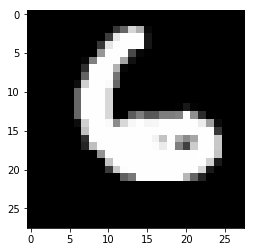

In [20]:
# displaying test image
plot_image(X_test[236])

In [21]:
# actual label
y_test[236]

6

## Prediciting 100 Images

In [22]:
predictions = []
for i in range(100):
    p = kNN(X_train , y_train, X_test[i], k=7)
    predictions.append(p)

In [23]:
predictions = np.array(predictions)

## Accuracy on 100 Images

In [24]:
(y_test[:100] == predictions).sum()/len(predictions)

0.99

##  KNN From sklearn 

In [33]:
# import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# create object
knn = KNeighborsClassifier()

In [27]:
# fitting/ trainig
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
# predicting
knn.predict([X_test[100]])

array([3], dtype=int64)

In [29]:
y_test[100]

3

In [30]:
y_pred = knn.predict(X_test)

In [35]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)#,"% for K-Value:",K_value)

Accuracy is  96.54761904761905
